In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
import io 
from scipy.interpolate import CubicSpline
import numpy as np
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [2]:

def read_pandas(file):
    read_data = pd.read_csv(file)

    data = pd.DataFrame({"date": read_data.Date, "temperature":read_data.tmps})
    data.temperature = data.temperature - 273.15
    data.date = pd.to_datetime(data.date)
    #data.dropna(inplace=True)
    
    return data

#Ucitavanje
f_iph = read_pandas("/content/gdrive/My Drive/InteligentniSoftver/Vezbe1/Za slanje/GDAS/GDAS_2017_2019_IPH.csv")
f_nbg = read_pandas("/content/gdrive/My Drive/InteligentniSoftver/Vezbe1/Za slanje/GDAS/GDAS_2017_2019_NBG.csv")
f_obr = read_pandas("/content/gdrive/My Drive/InteligentniSoftver/Vezbe1/Za slanje/GDAS/GDAS_2017_2019_OBR.csv")
f_laz = read_pandas("/content/gdrive/My Drive/InteligentniSoftver/Vezbe1/Za slanje/GDAS/GDAS_2018_2019_LAZ.csv")
f_ovc = read_pandas("/content/gdrive/My Drive/InteligentniSoftver/Vezbe1/Za slanje/GDAS/GDAS_2018_2019_OVC.csv")
f_usc = read_pandas("/content/gdrive/My Drive/InteligentniSoftver/Vezbe1/Za slanje/GDAS/GDAS_2018_2019_USC.csv")
f_vel = read_pandas("/content/gdrive/My Drive/InteligentniSoftver/Vezbe1/Za slanje/GDAS/GDAS_2018_2019_VEL.csv")
f_zem = read_pandas("/content/gdrive/My Drive/InteligentniSoftver/Vezbe1/Za slanje/GDAS/GDAS_2018_2019_ZEM.csv")

In [3]:
combined = pd.concat([f_nbg, f_obr, f_laz, f_ovc, f_usc, f_vel, f_zem, f_iph], ignore_index=True)
combined

date  temperature
0      2017-01-01 00:00:00        -5.76
1      2017-01-01 01:00:00          NaN
2      2017-01-01 02:00:00          NaN
3      2017-01-01 03:00:00        -6.30
4      2017-01-01 04:00:00          NaN
...                    ...          ...
166291 2019-12-31 19:00:00          NaN
166292 2019-12-31 20:00:00          NaN
166293 2019-12-31 21:00:00        -2.94
166294 2019-12-31 22:00:00          NaN
166295 2019-12-31 23:00:00          NaN

[166296 rows x 2 columns]

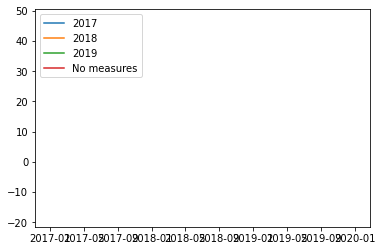

In [4]:
data_2017 = combined[combined.date < '2018-01-01 00:00:00']
data_2018 = combined[(combined.date > '2017-12-31 23:59:59') & (combined.date < '2018-12-31 23:59:59')]
data_2019 = combined[(combined.date > '2018-12-31 23:59:59') & (combined.date < '2019-12-31 23:59:59')]
data_no_measure = combined[(combined.date > '2019-07-14 22:00:00') & (combined.date < '2019-07-30 23:00:00')]


plt.plot(data_2017.date, data_2017.temperature)
plt.plot(data_2018.date, data_2018.temperature)
plt.plot(data_2019.date, data_2019.temperature, zorder=1)
plt.plot(data_no_measure.date, data_no_measure.temperature, zorder=2)
plt.bar(data_no_measure.date, data_no_measure.temperature, zorder=3)


plt.legend(['2017', '2018', '2019', 'No measures'])
plt.show()

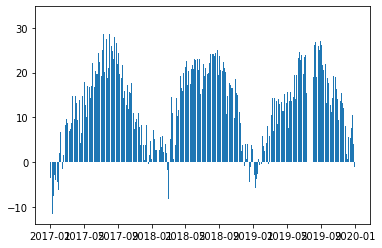

In [6]:
lista = []
count = 0
dan = None
srednja_temp = 0.0
std_list = []

f_iph_no_NaN = f_iph.dropna()

for index, row in f_iph_no_NaN.iterrows():

  if dan == None or dan != row[0].day:

    if len(std_list) > 0:
      datum = datetime.datetime(row[0].year, row[0].month, row[0].day)

      mean = sum(std_list) / len(std_list) 
      variance = sum([((x - mean) ** 2) for x in std_list]) / len(std_list) 
      res = variance ** 0.5
                                
      lista.append({"date": datum, 
                    "srednja_temp": srednja_temp/count, 
                    "std": res})

    dan = row[0].day
    srednja_temp = 0.0
    count = 0
    std_list = []

  
  srednja_temp += row[1]
  std_list.append(row[1])
  count +=1


frame = pd.DataFrame(lista)


plt.bar(frame.date, frame.srednja_temp)
plt.show()

plt.bar(frame.date, frame['std'])
plt.show()


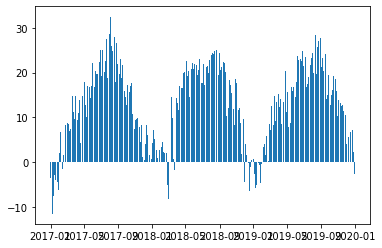

In [7]:
#Linearna interpolacija

df_interpol = f_iph.resample('D', on="date").mean()
df_interpol['temperature'] = df_interpol['temperature'].interpolate()

plt.bar(df_interpol.index, df_interpol.temperature)
plt.show()

In [10]:
#Cubic spline

#cubic = f_iph.temperature.interpolate(method="cubic")
#spline = f_iph.temperature.interpolate(method='spline', order=3, s=0.)


df_interpol = frame.resample('D', on="date").mean()
df_interpol['srednja_temp'] = df_interpol['srednja_temp'].interpolate(method="cubic")

plt.bar(df_interpol.index, df_interpol.srednja_temp)
plt.show()